### A one layer hidden neural network and backpropagation from scratch. 
## HODA AKL
HW 1 problem 2 <br>
EEL6814 <br> <br>
We are given a dataset of a few points (two dimensional each) and their binary classification and we need to make a one hidden layer neural network to predict classification of other points in the space. <br>
- I used 5 units in the hidden layer
- The minimum number I can use is 4. I chose 5 after looking at the perfomance plot or the error with epochs shown below. 
- I think way to generalize the accuracy is to use more training data, then changes "the steps" in the error plot that are caused by having very few data points and makes it more smooth, also it obviously trains in less epochs. Shown below.

# Creating the network functions 

In [1]:
import numpy as np
def sigmoid(z):
    sm = 1.0 / (1.0 + np.exp(-z))
    return sm
#before this define : nhidden, nout
def init_w(d,nhidden,nout):
    #inputs: d = dimension of raw input data 
    # nhidden = number of hidden neurons in the hidden layer 
    # nout = number of nodes in the output layer
    w1 = np.random.rand(nhidden, d+1)
    w2 = np.random.rand(nout,nhidden+1)
    return w1 , w2
# 
def forward_pass(x,w1,w2):
    # x -> raw input 
    # w1 -> weights to be multiplied with input 
    # w2 -> weights to be multiplied with hidden layer output 
    d = len(x); #dimension of input (layer 0)
    a1 = np.zeros(d+1); #initializing the other input 
    a1[:d] = x; #putting the input in
    a1[-1] =1; #The bias 
    net1 = a1.dot(w1.T) #net 1
    y1 = sigmoid(net1)
    a2 = np.zeros(nhidden+1); #initializing the other input 
    a2[:nhidden] = y1; #putting the input in
    a2[-1] =1; #The bias 
    net2 = a2.dot(w2.T)
    y2 = sigmoid(net2)
    return y1, y2, net1, net2, a1, a2    
# Calculated the deltaJ/deltaw2
def pJw2(e, a2,y2): 
    a2 = a2.reshape(1,len(a2))
    vec1 = 2*e*y2*(1-y2)
    vec2 = vec1.T
    vec2 = vec2.reshape(len(vec2),1)
#     print(a2.shape)
#     print(vec2.shape)
    deltaw2 = np.matmul(vec2,a2)
    return deltaw2
def pJw1(e,y2,y1,w2,a1):
    vec1 = e*y2*(1-y2);  
    vec1 = vec1.reshape(1,vec1.shape[0]);vec1.shape
    vec2 = np.matmul(vec1,w2[:,:-1])
    # print(vec2, vec2.shape)
    vec3 = vec2*y1*(1-y1)
    # print(vec3, vec3.shape)
    a1 = a1.reshape(1, a1.shape[0])
    delta = np.matmul(vec3.T,a1)
    return delta 
def Update_W(alpha,e,y2,y1,w2,a1, a2):
    deltaw1 = pJw1(e,y2,y1,w2,a1);
    deltaw2 = pJw2(e, a2,y2);
    w1new = w1.copy() + alpha*deltaw1;
    w2new = w2.copy() + alpha*deltaw2;
    return w1new,w2new
def calc_error_one_sample(desire, output):
    e = desire - output
    J = (1/2)*e.dot(e)
    return e, J
def train_network(inp , desire, w1, w2, nhidden, alpha):
    d = len(inp); 
    nout = len(desire)
    #forward pass
    y1, y2, net1, net2, a1, a2 = forward_pass(inp,w1,w2)
    #calculates the error 
    e,J = calc_error_one_sample(desire, y2)
#update the weights
    w1new, w2new = Update_W(alpha,e,y2,y1,w2,a1,a2)
    return w1new, w2new, J, y2

# Testing that the functions work

In [2]:
# define dimensions: 
d = 2; nhidden = 5; nout = 1; alpha=.1;
x = np.array([1,1]);
desire = np.array([1]);
#initialize the weights
w1,w2 = init_w(d,nhidden,nout)
# run forward pass 
y1, y2, net1, net2, a1, a2 = forward_pass(x,w1,w2)
#calculates the error 
e, J = calc_error_one_sample(desire, y2)
#update the weights
w1new, w2new = Update_W(alpha,e,y2,y1,w2,a1,a2)

In [3]:
w2[:,:-1].shape

(1, 5)

In [4]:
#test the train_network 
#define dimensions of network
nhidden = 1; #neurons in the hidden layer
alpha = .1; #learning rate
d=2; #input dimension 
nout = 2; #output dimension 
w1,w2 = init_w(d,nhidden,nout)
x = np.array([1,1]); desire = np.array([1]);
w1new, w2new, J,y2 = train_network(x , desire, w1, w2, nhidden, alpha)

# Importing the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Get the data 
path = 'C:\everything\Courses\EEL6814 - Neural Networks and Deep Learning\HW\HW1\HW1Prob2_Dataset.csv'
DS = pd.read_csv(path,sep = ',')

In [6]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
# scl = MinMaxScaler()
from sklearn.utils import shuffle
DS_shuff = shuffle(DS,random_state=42)
XToFit = DS_shuff[['x1','x2']].values
yToFit = DS_shuff[['d']].values
# XToFit2 = scl.fit_transform(XToFit)
XToFit2 = XToFit.copy()
# ones = np.ones((len(XToFit2),1))
# XToFit2 = np.append(ones,XToFit2,axis=1)
yToFit2 = yToFit.reshape(len(yToFit),1)

In [ ]:
# from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical   
yTrain_oneHot = to_categorical(yToFit, 2)


## The one hot encoding works as the following [0 1 ] corresponds to label [1] and [1 0] corresponds to label [0]
So that the index that has the maximum value is the winner. 

# Training the network

In [8]:
nhidden = 5;  #for the reason why see plot below
nepochs = 10000; 
d = 2; #input dimension 
nout = 2;  #output dimension 
alpha = .1; #learning rate
#initialize the weights 
Error_Array = np.zeros(nepochs);
w1,w2 = init_w(d,nhidden,nout);
nsamples = XToFit2.shape[0];
for i in range(nepochs):
#     print('Epoch ' ,i)
    se = 0; 
    for j in range(nsamples):
        x = XToFit2[j]
        desire = yTrain_oneHot[j]
        w1new, w2new, J, y2 = train_network(x , desire, w1, w2, nhidden, alpha)
        w1 = w1new.copy();
        w2 = w2new.copy();
        se = se+J;
    Error_Array[i] = se/nsamples;

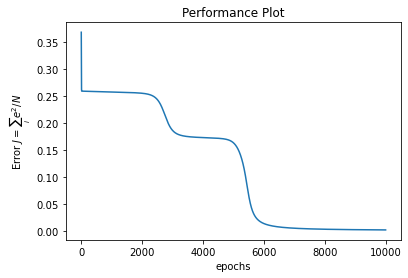

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(Error_Array)
plt.xlabel('epochs')
plt.ylabel('Error $J = \sum_{i} e^{2}/N$')
plt.title('Performance Plot')
plt.show()
plt.savefig('Training_50000_PerformancePlot.png')

Saving the weights 

In [33]:
np.save('w1_10000_nhidden5',w1)
np.save('w2_10000_nhidden5',w2)
np.save('error_nhidden5', Error_Array)
# np.save('xTrain', XToFit2)
# np.save('y_one_hot', yTrain_oneHot)

## make new data to test on it 

In [10]:
#Creating the points 
npoints = 20;
x1 = np.linspace(-1,1,npoints);
x2 = np.linspace(-1,1,npoints);
[X1,X2] = np.meshgrid(x1,x2);
X1 = X1.reshape(npoints**2);
X2 = X2.reshape(npoints**2);
dataset = np.zeros((npoints**2, 2));
dataset[:,0] = X1 
dataset[:,1] = X2

# Running the forward pass on the testing data

In [11]:
Predicted = np.zeros(npoints**2);
for i in range(npoints**2):
    _, y2, _, _, _, _ = forward_pass(dataset[i,:],w1,w2)
    Predicted[i] = np.argmax(y2)

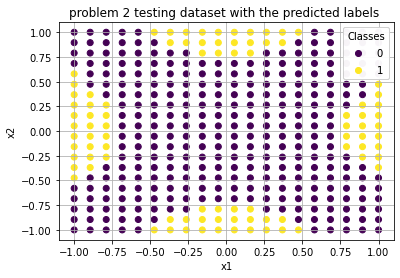

<Figure size 432x288 with 0 Axes>

In [12]:
from matplotlib import pyplot as plt
fig , ax = plt.subplots()
scatter = ax.scatter(X1,X2, c= Predicted)
legend1 = ax.legend(*scatter.legend_elements(), loc = 'upper right',
                   title = "Classes")
ax.add_artist(legend1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('problem 2 testing dataset with the predicted labels ')
plt.grid(True)
plt.show()
plt.savefig('Testing.png')

# That works. 

# Choosing the optimum number of PE's 
By Trial: I will test nhidden = [1 , 2 , 3, 4 , 5 , 6 , 7 , 8 , 9 , 10] and plot how the error changes with each epoch. 

In [22]:
nodes = np.array([1,2,3,4,5,6,7,8,9,10])
nepochs = 10000; 
ntrials = 10; 
d = 2; #input dimension 
nout = 2;  #output dimension 
alpha = .1; #learning rate
Error_Array = np.zeros((ntrials,nepochs))
nsamples = XToFit2.shape[0];
for k in range(ntrials): 
    nhidden = nodes[k]
    w1,w2 = init_w(d,nhidden,nout); 
    print('hidden nodes = ', nhidden, 'Training')
    for i in range(nepochs):
#     print('Epoch ' ,i)
        se = 0; 
        for j in range(nsamples):
            x = XToFit2[j]
            desire = yTrain_oneHot[j]
            w1new, w2new, J, y2 = train_network(x , desire, w1, w2, nhidden, alpha)
            w1 = w1new.copy();
            w2 = w2new.copy();
            se = se+J;
        Error_Array[k,i] = se/nsamples;

hidden nodes =  1 Training
hidden nodes =  2 Training
hidden nodes =  3 Training
hidden nodes =  4 Training
hidden nodes =  5 Training
hidden nodes =  6 Training
hidden nodes =  7 Training
hidden nodes =  8 Training
hidden nodes =  9 Training
hidden nodes =  10 Training


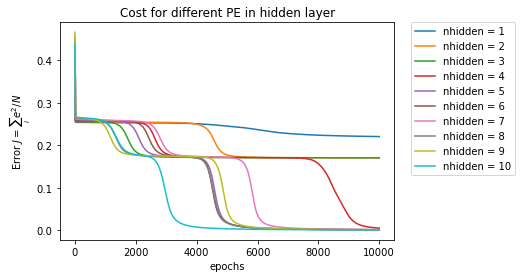

In [27]:
for i in range(ntrials):
    plt.plot(Error_Array[i,:], label="nhidden = "+str(nodes[i]))
#     plt.legend('nhidden = 'nodes[i] )
plt.xlabel('epochs')
plt.ylabel('Error $J = \sum_{i} e^{2}/N$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Cost for different PE in hidden layer')
plt.show()

I looks like the minimum number I can use to get this to work is 4 nodes in the hidden layer and it also looks the perfomance of 5 and 6 nodes are similar they both converge in less that 6000 epochs, it takes longer when you increase, then drops again at nhidden = 10. So I would use nhidden =5.

# To genaleralize the accuracy of the solution 

In [19]:
# To generalize the accuracy  of the solution use more points in training 
newdata = np.zeros((npoints**2,3));
newdata[:,:2] = dataset; 
newdata[:,2] = Predicted

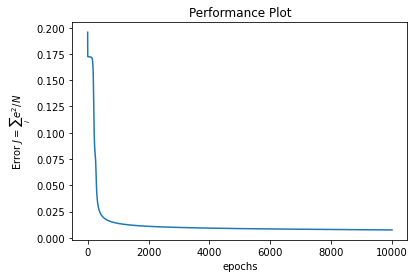

In [18]:
# shuffle the data
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
# scl = MinMaxScaler()
from sklearn.utils import shuffle
DS_shuff = shuffle(newdata,random_state=42)
XToFit = DS_shuff[:,:-1]
yToFit = DS_shuff[:,-1]
# XToFit2 = scl.fit_transform(XToFit)
XToFit2 = XToFit.copy()
# ones = np.ones((len(XToFit2),1))
# XToFit2 = np.append(ones,XToFit2,axis=1)
yToFit2 = yToFit.reshape(len(yToFit),1)
# one hot encode 
# from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical   
yTrain_oneHot = to_categorical(yToFit, 2)
# train network and save the error 
nhidden = 5;  #for the reason why see plot below
nepochs = 10000; 
d = 2; #input dimension 
nout = 2;  #output dimension 
alpha = .1; #learning rate
#initialize the weights 
Error_Array = np.zeros(nepochs);
w1,w2 = init_w(d,nhidden,nout);
nsamples = XToFit2.shape[0];
for i in range(nepochs):
#     print('Epoch ' ,i)
    se = 0; 
    for j in range(nsamples):
        x = XToFit2[j]
        desire = yTrain_oneHot[j]
        w1new, w2new, J, y2 = train_network(x , desire, w1, w2, nhidden, alpha)
        w1 = w1new.copy();
        w2 = w2new.copy();
        se = se+J;
    Error_Array[i] = se/nsamples;
# plot the error
plt.plot(Error_Array)
plt.xlabel('epochs')
plt.ylabel('Error $J = \sum_{i} e^{2}/N$')
plt.title('Performance Plot')
plt.show()
# plt.savefig('Training_50000_PerformancePlot.png')

The curve does not get stuck as much as with lower data points